Karar
Kanser      64
Sağlikli    52
Name: count, dtype: int64
Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
Karar          0
dtype: int64


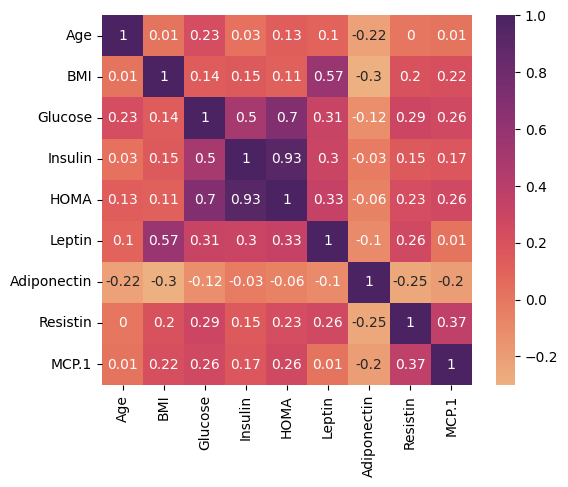

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score

# Veri okuma
veriSeti = pd.read_csv("dataR2.csv")

# Veri ön işleme
veriSeti = veriSeti.rename(columns={"Classification": "Karar"})
veriSeti["Karar"].value_counts
veriSeti["Karar"] = np.where(veriSeti["Karar"] == 1, "Sağlikli", "Kanser")
veriSeti["Karar"].value_counts

veriSeti.Karar = veriSeti.Karar.astype("category")
print(veriSeti.Karar.value_counts())

# Veri seti hakkında bilgi
pd.set_option("display.max_columns", 20)
veriSeti.describe(include="all")

# veri seti türleri
veriSeti.dtypes

# eksik veri kontrolü
print(veriSeti.isnull().sum())


# nitelikler arasında korelasyonun incelenmesi
my_cors = pd.DataFrame(np.corrcoef(veriSeti.iloc[:, :9], rowvar=False)
                       .round(2), columns=veriSeti.columns[0:9])
my_cors.index = veriSeti.columns[0:9]

# korelasyon Isı haritası
sns.heatmap(my_cors,
            annot= True,
            square= True,
            cmap = sns.color_palette("flare", as_cmap=True))

# eğitim ve test veri setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(veriSeti.iloc[:, 0:9], veriSeti.iloc[:,9], test_size=0.3, random_state=1)


# Veri normalizasyonu
scaler = MinMaxScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_n = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)












